In [2]:
from itertools import product

import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import sympy as sp
from IPython.display import display
from sympy import abc, oo, Rational, init_printing

import checked_functions as c_f
import symbols as sym

init_printing()

# This document aims to numerically check $\overline{w'r_t'\theta_l'}$

## Define the normal distributions.

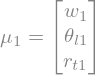

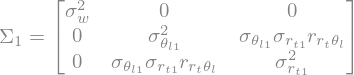

In [3]:
display(sp.Eq(sp.symbols('\\mu_1'), c_f.mu_1_w_theta_l_r_t, evaluate=False))
display(sp.Eq(sp.symbols('\\Sigma_1'), c_f.Sigma_1_w_theta_l_r_t, evaluate=False))
#display(sp.Eq(sym.G_1_w_theta_l_r_t, c_f.G_1_w_theta_l_r_t_density))

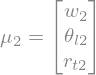

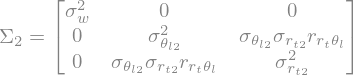

In [4]:
display(sp.Eq(sp.symbols('\\mu_2'), c_f.mu_2_w_theta_l_r_t, evaluate=False))
display(sp.Eq(sp.symbols('\\Sigma_2'), c_f.Sigma_2_w_theta_l_r_t, evaluate=False))
#display(sp.Eq(sym.G_2_w_theta_l_r_t, c_f.G_2_w_theta_l_r_t_density))

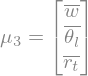

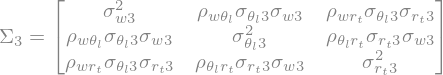

In [5]:
display(sp.Eq(sp.symbols('\\mu_3'), c_f.mu_3_w_theta_l_r_t, evaluate=False))
display(sp.Eq(sp.symbols('\\Sigma_3'), c_f.Sigma_3_w_theta_l_r_t, evaluate=False))
#display(sp.Eq(sym.G_3_w_theta_l_r_t, c_f.G_3_w_theta_l_r_t_density))

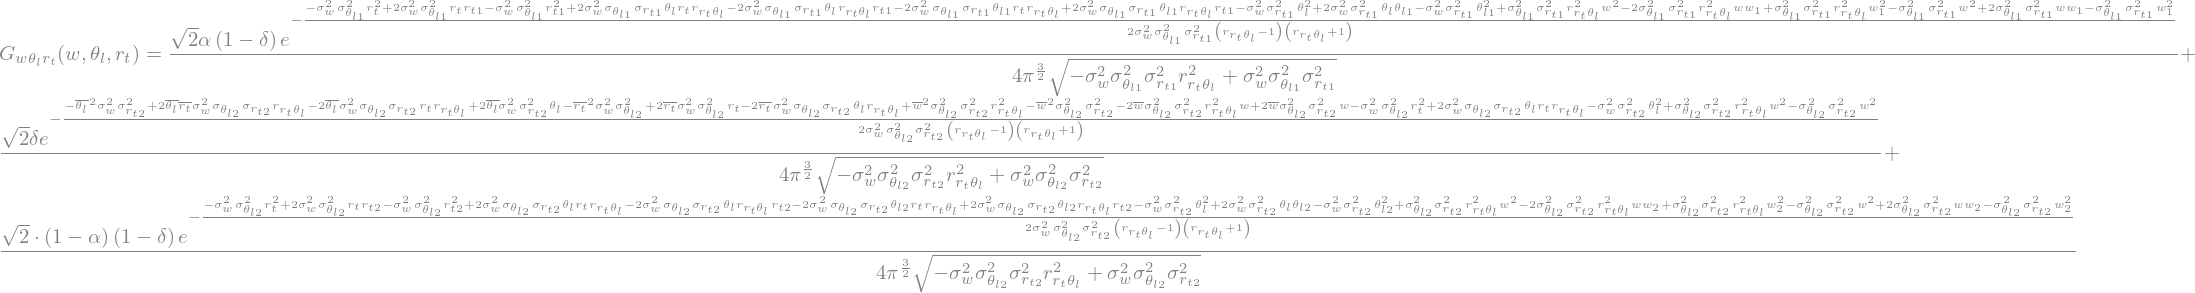

In [6]:
display(sp.Eq(sym.G_w_theta_l_r_t, c_f.G_w_theta_l_r_t))

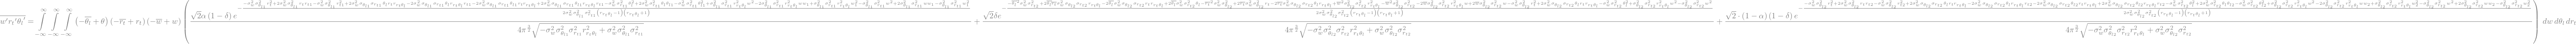

In [7]:
w_prime_r_t_prime_theta_l_prime_bar = sp.Integral(
    (sp.abc.w - sym.w_bar) * (sym.r_t - sym.r_t_bar) * (sp.abc.theta - sym.theta_l_bar) * c_f.G_w_theta_l_r_t,
    [sp.abc.w, -oo, oo],
    [sym.theta_l, -oo, oo],
    [sym.r_t, -oo, oo])
display(sp.Eq(sym.w_prime_r_t_prime_theta_l_prime_bar, w_prime_r_t_prime_theta_l_prime_bar))

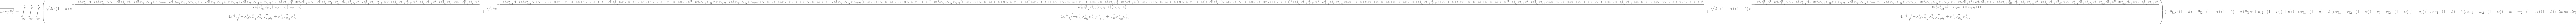

In [8]:
w_prime_r_t_prime_theta_l_prime_bar = (
    w_prime_r_t_prime_theta_l_prime_bar.subs({
        sym.w_bar: c_f.w_bar(),
        sym.r_t_bar: c_f.r_t_bar(),
        sym.theta_l_bar: c_f.theta_l_bar()
    }))
display(sp.Eq(sym.w_prime_r_t_prime_theta_l_prime_bar, w_prime_r_t_prime_theta_l_prime_bar))

The equation in the document is:

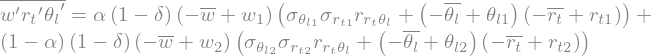

In [9]:
display(sp.Eq(sym.w_prime_r_t_prime_theta_l_prime_bar, c_f.w_prime_r_t_prime_theta_l_prime_bar()))

Since the integral is too difficult to be calculated analytically, at least with sympy, we try to put in some arbitrary numbers for the pdf parameters, to simplify the equations.

We also use the method `nquad(..)` from `sympy` to get a numerical evaluation of the 3d integral.

We create a dataframe to get all possible permutations and therefore also all possible evaluations of the integrals.

In [10]:
df = pd.DataFrame(
    product([3, 1],
            [-2],
            [-1, 3],
            [2],
            [1, 4],
            [2],
            [1.1],
            [1.3],
            [1.4],
            [1.7],
            [1.2],
            [1.5],
            [1.9],
            [1.6],
            [.55],
            [.8],
            [.65],
            [.45],
            [.35],
            [.5]),
    columns=[sym.w_1,
             sym.w_2,
             sym.theta_l_1,
             sym.theta_l_2,
             sym.r_t_1,
             sym.r_t_2,
             sym.sigma_theta_l_1,
             sym.sigma_theta_l_2,
             sym.sigma_theta_l_3,
             sym.sigma_w,
             sym.sigma_r_t_1,
             sym.sigma_r_t_2,
             sym.sigma_r_t_3,
             sym.sigma_w_3,
             sp.abc.alpha,
             sp.abc.delta,
             sym.rho_w_theta_l,
             sym.rho_w_r_t,
             sym.rho_theta_l_r_t,
             sym.r_r_t_theta_l])

In [11]:
w_prime_r_t_prime_theta_l_prime_bar_check_sym_val = (
    c_f.w_prime_r_t_prime_theta_l_prime_bar().subs({
        sym.w_bar: c_f.w_bar(),
        sym.r_t_bar: c_f.r_t_bar(),
        sym.theta_l_bar: c_f.theta_l_bar()
    }))

In [12]:
df['check_val'] = (
    df.apply(lambda x: Rational(c_f.w_prime_r_t_prime_theta_l_prime_bar().subs({
        sym.w_bar: c_f.w_bar(),
        sym.theta_l_bar: c_f.theta_l_bar(),
        sym.r_t_bar: c_f.r_t_bar(),
        sym.w_1: x[sym.w_1],
        sym.w_2: x[sym.w_2],
        sym.theta_l_1: x[sym.theta_l_1],
        sym.theta_l_2: x[sym.theta_l_2],
        sym.r_t_1: x[sym.r_t_1],
        sym.r_t_2: x[sym.r_t_2],
        sym.sigma_theta_l_1: x[sym.sigma_theta_l_1],
        sym.sigma_theta_l_2: x[sym.sigma_theta_l_2],
        sym.sigma_r_t_1: x[sym.sigma_r_t_1],
        sym.sigma_r_t_2: x[sym.sigma_r_t_2],
        sp.abc.alpha: x[sp.abc.alpha],
        sp.abc.delta: x[sp.abc.delta],
        sym.r_r_t_theta_l: x[sym.r_r_t_theta_l]
    }).evalf()), axis=1))

Calculate the moment numerically:

In [13]:
import scipy

df['num_int'] = df.apply(lambda x: scipy.integrate.nquad(
    sp.lambdify(
        [sp.abc.w, sym.r_t, sym.theta_l],
        (((sp.abc.w - c_f.w_bar()) *
          (sym.r_t - c_f.r_t_bar()) *
          (sym.theta_l - c_f.theta_l_bar()) *
          c_f.G_w_theta_l_r_t))
        .subs({
            sym.w_bar: c_f.w_bar(),
            sym.r_t_bar: c_f.r_t_bar(),
            sym.theta_l_bar: c_f.theta_l_bar(),
            sym.w_1: x[sym.w_1],
            sym.w_2: x[sym.w_2],
            sym.theta_l_1: x[sym.theta_l_1],
            sym.theta_l_2: x[sym.theta_l_2],
            sym.r_t_1: x[sym.r_t_1],
            sym.r_t_2: x[sym.r_t_2],
            sym.sigma_w: x[sym.sigma_w],
            sym.sigma_w_3: x[sym.sigma_w_3],
            sym.sigma_theta_l_1: x[sym.sigma_theta_l_1],
            sym.sigma_theta_l_2: x[sym.sigma_theta_l_2],
            sym.sigma_theta_l_3: x[sym.sigma_theta_l_3],
            sym.sigma_r_t_1: x[sym.sigma_r_t_1],
            sym.sigma_r_t_2: x[sym.sigma_r_t_2],
            sym.sigma_r_t_3: x[sym.sigma_r_t_3],
            sp.abc.alpha: x[sp.abc.alpha],
            sp.abc.delta: x[sp.abc.delta],
            sym.rho_w_theta_l: x[sym.rho_w_theta_l],
            sym.rho_w_r_t: x[sym.rho_w_r_t],
            sym.rho_theta_l_r_t: x[sym.rho_theta_l_r_t],
            sym.r_r_t_theta_l: x[sym.r_r_t_theta_l]
        })),
    ranges=[[-30, 30], [-30, 30], [-30, 30]])[0],
                         axis=1)

In [14]:
df['diff'] = abs(df['check_val'] - df['num_int'])

In [15]:
df['diff_num'] = abs(df['check_val'].astype(float) - df['num_int'])

In [16]:
display(df)

,w_1,w_2,\theta_{l1},\theta_{l2},r_{t1},r_{t2},\sigma_{\theta_{l1}},\sigma_{\theta_{l2}},\sigma_{\theta_l 3},\sigma_w,\sigma_{r_{t1}},\sigma_{r_{t2}},\sigma_{r_t 3},\sigma_{w3},alpha,delta,\rho_{w\theta_l},\rho_{wr_t},\rho_{\theta_lr_t},r_{r_t\theta_l},check_val,num_int,diff,diff_num
0,3,-2,-1,2,1,2,1.1,1.3,1.4,1.7,1.2,1.5,1.9,1.6,0.55,0.8,0.65,0.45,0.35,0.5,-1371008316562263/9007199254740992,-0.152212,8.36322677777446e-12,8.363227e-12
1,3,-2,-1,2,4,2,1.1,1.3,1.4,1.7,1.2,1.5,1.9,1.6,0.55,0.8,0.65,0.45,0.35,0.5,317672658715647/4503599627370496,0.070537,5.72901864837050e-11,5.729019e-11
2,3,-2,3,2,1,2,1.1,1.3,1.4,1.7,1.2,1.5,1.9,1.6,0.55,0.8,0.65,0.45,0.35,0.5,-7668729445486485/144115188075855872,-0.053213,1.93393243086426e-9,1.933932e-09
3,3,-2,3,2,4,2,1.1,1.3,1.4,1.7,1.2,1.5,1.9,1.6,0.55,0.8,0.65,0.45,0.35,0.5,-574040067503711/4503599627370496,-0.127462,1.62874713716121e-11,1.628747e-11
4,1,-2,-1,2,1,2,1.1,1.3,1.4,1.7,1.2,1.5,1.9,1.6,0.55,0.8,0.65,0.45,0.35,0.5,-6580839919498863/72057594037927936,-0.091327,1.71213043742569e-12,1.712130e-12
5,1,-2,-1,2,4,2,1.1,1.3,1.4,1.7,1.2,1.5,1.9,1.6,0.55,0.8,0.65,0.45,0.35,0.5,6099315047340423/144115188075855872,0.042323,4.71222366682511e-12,4.712224e-12
6,1,-2,3,2,1,2,1.1,1.3,1.4,1.7,1.2,1.5,1.9,1.6,0.55,0.8,0.65,0.45,0.35,0.5,-4601237667291891/144115188075855872,-0.031927,2.54032905822044e-13,2.540329e-13
7,1,-2,3,2,4,2,1.1,1.3,1.4,1.7,1.2,1.5,1.9,1.6,0.55,0.8,0.65,0.45,0.35,0.5,-2755392324017813/36028797018963968,-0.076477,9.43733979852368e-12,9.437340e-12


In [17]:
import numpy as np

print('The mean error between the rhs and the lhs is:', np.mean(df['diff_num']))

The mean error between the rhs and the lhs is: 2.5399863028824354e-10
